In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from tqdm import tqdm

In [3]:
def show_image(images, labels, n = 2):
  plt.figure(figsize = (12, 12))
  for i, image in enumerate(images[:n]):
    plt.subplot(n, n, i + 1)
    image = image / 2 + 0.5
    plt.imshow(image.numpy().transpose((1, 2, 0)).squeeze())

  print("Real Labels: ", ' '.join('%5s' % classes[label] for label in labels[:n]))

classes = ("T-intersection-1", "left-T-intersection-1", "no-left-turn-1", 
           "right-T-intersection-1", "stop-1", "traffic-light-1")

PATH = "/content/drive/MyDrive/Test"

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
transform = transforms.Compose(
    [transforms.Resize( (64, 64) ),
     transforms.ToTensor(),
     transforms.Normalize( mean = [0.5, 0.5, 0.5], std = [0.5, 0.5, 0.5])]
)

In [6]:
trainset = torchvision.datasets.ImageFolder(os.path.join(PATH, "train_im"), transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, num_workers=0, shuffle=True)

testset = torchvision.datasets.ImageFolder(os.path.join(PATH, "test"), transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, num_workers=0, shuffle=True)

Real Labels:  stop-1 left-T-intersection-1


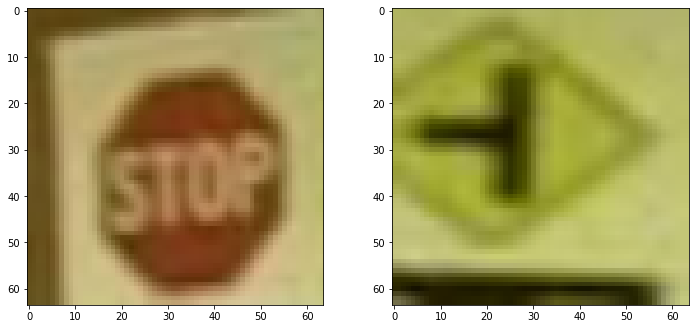

In [36]:
images, labels = next(iter(trainloader))
show_image(images, labels)

In [7]:
model = torchvision.models.resnet18(pretrained=True)
for param in model.parameters():
    param.require = False
model.fc = nn.Linear(512, 6)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [8]:
crenloss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)

In [13]:
epochs = 12
model.to(device) 
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in tqdm(enumerate(trainloader)):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = crenloss(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print("Epoch {} - Training loss: {} ".format(epoch, running_loss/len(trainloader)))

8it [00:01,  6.92it/s]


Epoch 0 - Training loss: 0.0032194947780226357 


8it [00:01,  7.17it/s]


Epoch 1 - Training loss: 0.0038839997723698616 


8it [00:01,  7.14it/s]


Epoch 2 - Training loss: 0.0035332709494468872 


8it [00:01,  7.60it/s]


Epoch 3 - Training loss: 0.004385712614748627 


8it [00:01,  7.79it/s]


Epoch 4 - Training loss: 0.003997875843197107 


8it [00:01,  7.41it/s]


Epoch 5 - Training loss: 0.020225212592777098 


8it [00:01,  7.05it/s]


Epoch 6 - Training loss: 0.02034518368782301 


8it [00:01,  7.47it/s]


Epoch 7 - Training loss: 0.013249115785583854 


8it [00:01,  7.32it/s]


Epoch 8 - Training loss: 0.01157803237947519 


8it [00:01,  7.12it/s]


Epoch 9 - Training loss: 0.005508820810064208 


8it [00:01,  6.86it/s]


Epoch 10 - Training loss: 0.0037779171971124015 


8it [00:01,  6.89it/s]

Epoch 11 - Training loss: 0.003446416503720684 


In [14]:
correct = 0
total = 0
with torch.no_grad():
    model.eval()
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print("Accuracy: %d" %(100 * correct/total))

Accuracy: 75


Real Labels:  right-T-intersection-1 T-intersection-1
Predicted:  right-T-intersection-1 T-intersection-1


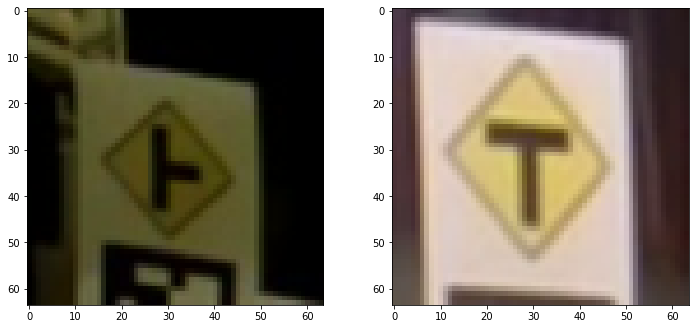

In [61]:
images, labels = next(iter(testloader))
show_image(images, labels)

outputs = model(images.to(device))

_, predicted = torch.max(outputs, 1)

print("Predicted: ", " ".join("%5s" %classes[predict] for predict in predicted[:2]))